In [32]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.preprocessing import StandardScaler
import seaborn as sns
import matplotlib.pyplot as plt

In [33]:
df = pd.read_csv('cleaned_data.csv')

In [ ]:
#spiting dataset for Analysis
#preparing featrure and target Variable

x = df.drop(columns=['attrition'])
y = df['attrition']

In [35]:
#coverting all categorical data to numerrical
x = pd.get_dummies(x, drop_first=True)

In [36]:
#scaling all feature
scaler = StandardScaler()
x_scaled = scaler.fit_transform(x)

In [37]:
#Spliting dataframe fot train tests
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=17)
#0.3 mean 70/30 split of dataframe and  17 is random number

In [38]:
logreg_model = LogisticRegression(solver = 'saga', max_iter=5000)
logreg_model.fit(x_train, y_train)

LogisticRegression(max_iter=5000, solver='saga')

In [39]:
#Making Prediciton
y_pred = logreg_model.predict(x_test)

In [40]:
#Accuracy score
accuracy = accuracy_score(y_test, y_pred)
print(f"accuracy:{accuracy * 100:.2f}%")

accuracy:55.26%


In [41]:
# Confusion matrix
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))

Confusion Matrix:
[[ 728 1397]
 [ 603 1742]]


In [42]:
# Classification report (Precision, Recall, F1-score)
print("Classification Report:")
print(classification_report(y_test, y_pred))

Classification Report:
              precision    recall  f1-score   support

        Left       0.55      0.34      0.42      2125
      Stayed       0.55      0.74      0.64      2345

    accuracy                           0.55      4470
   macro avg       0.55      0.54      0.53      4470
weighted avg       0.55      0.55      0.53      4470



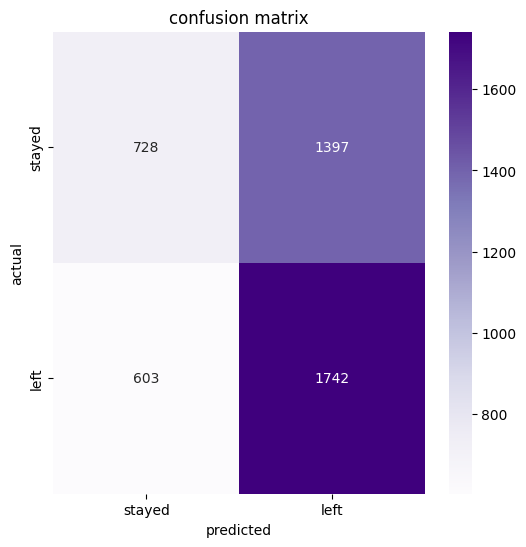

In [ ]:
#Confusion Matrix

cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(6, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Purples',    xticklabels=['stayed', 'left'], yticklabels=['stayed', 'left'])
plt.ylabel('actual')
plt.xlabel('predicted')
plt.title('confusion matrix')
plt.show()